In [1]:
from mpl_toolkits.basemap import Basemap
from netCDF4 import Dataset
import numpy as np

# from matplotlib.mlab import bivariate_normal

import cartopy.crs as ccrs
import xarray as xr
import pandas as pd

import math

import matplotlib.pyplot as plt
import cartopy.crs as crs
import cartopy.feature as cfeature
import matplotlib.colors as colors
from matplotlib.cm import get_cmap
from matplotlib import ticker
import matplotlib.gridspec as gridspec
from matplotlib.ticker import EngFormatter, StrMethodFormatter

from cartopy import config
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.util import add_cyclic_point

from IPython.display import Image

from tqdm import tqdm
import os 

In [2]:
Years = ["2000","2001","2002","2003","2004","2005","2006","2007","2008","2009"]
# Years = ["2009"]

Months = []
for imon in range(1,13): ### shw
    Months.append(str(imon).zfill(2))
    
Days = []
for iday in range(1,29,3):
    Days.append(str(iday).zfill(2))
    
print(Years)
print(Months)
print(Days)

['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009']
['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
['01', '04', '07', '10', '13', '16', '19', '22', '25', '28']


In [3]:
Pressure = [100, 75, 65, 55, 40, 30] # hPa
Height   = [16,  17.92, 18.87, 20, 22.1, 24] # km


In [4]:
Nx = 24
Ny = 21
Nz = 6
N_parcel = Nx*Ny*Nz
# if Nx*Ny*Nz!=N_parcel: print('ERROR: parcel number is wrong!')
    
N_year  = len(Years)
N_month = len(Months)
N_day   = len(Days)


# tropical exiting locations
LON1 = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))
LAT1 = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))
LEV1 = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))

LON1_exit = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))
LAT1_exit = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))
LEV1_exit = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))
print(LON1_exit.shape)


# tropopause sink locations + lifetime
LON2 = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))
LAT2 = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))
LEV2 = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))

lifetime2   = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))
lifetime2_N = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))
lifetime2_S = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))

LON2_sink = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))
LAT2_sink = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))
LEV2_sink = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))

(6, 21, 24, 10, 12, 10)


In [5]:
# for tropical exiting locations

directory1 = './Exiting_Pressure_data/'
filename1 = "Exiting_Press_"+Years[0]+Months[0]+Days[0]+".txt"
print(directory1+filename1)

for i_year in range(N_year):
    for i_month in tqdm(range(N_month)):
        for i_day in range(N_day):
            filename1 = "Exiting_Press_"+Years[i_year]+Months[i_month]+Days[i_day]+".txt"
            File1 = open(directory1+filename1, 'r')
        
            Lines1 = File1.readlines()

            # Strips the newline character
            data   = []
            data_N = []
            data_S = []
            Longitude = []
            Latitude  = []
            Press     = []
            Longitude_final = []
            Latitude_final  = []
            Press_final = []
            for line1 in Lines1:
                a1 = line1.split(',')
                # tropical lifetime
                data.append(float(a1[0]))
                data_N.append(float(a1[1]))
                data_S.append(float(a1[2]))
                # injection location
                Longitude.append(float(a1[3]))
                Latitude.append(float(a1[4]))
                Press.append(float(a1[5]))
                # tropical exiting locations
                Longitude_final.append(float(a1[6]))
                Latitude_final.append(float(a1[7]))
                Press_final.append(float(a1[8]))
            
    
            i = 0
            for ix in range(Nx):
                for iy in range(Ny):
                    for iz in range(Nz):
                        
                        LON1[iz,iy,ix,i_day,i_month,i_year] = Longitude[i]
                        LAT1[iz,iy,ix,i_day,i_month,i_year] = Latitude[i]
                        LEV1[iz,iy,ix,i_day,i_month,i_year] = Press[i]
                        
                        LON1_exit[iz,iy,ix,i_day,i_month,i_year] = Longitude_final[i]
                        LAT1_exit[iz,iy,ix,i_day,i_month,i_year] = Latitude_final[i]
                        LEV1_exit[iz,iy,ix,i_day,i_month,i_year] = Press_final[i]                        
                        
                        i = i+1

./Exiting_Pressure_data/Exiting_Press_20000101.txt


100%|██████████| 12/12 [00:03<00:00,  3.37it/s]


In [6]:
# for tropopause sink locations

directory1 = '/n/home12/hongwei/Paper_3_QBO/Lifetime_New_Tropopause/Lifetime/'
filename1 = "Lifetime_"+Years[0]+Months[0]+Days[0]+".txt"
print(directory1+filename1)

for i_year in range(N_year):
    for i_month in tqdm(range(N_month)):
        for i_day in range(N_day):
            filename1 = "Lifetime_"+Years[i_year]+Months[i_month]+Days[i_day]+".txt"
            File1 = open(directory1+filename1, 'r')
        
            Lines1 = File1.readlines()

            # Strips the newline character
            data   = []
            data_N = []
            data_S = []
            Longitude = []
            Latitude  = []
            Press     = []
            Longitude_final = []
            Latitude_final  = []
            Press_final = []
            for line1 in Lines1:
                a1 = line1.split(',')
                # stratospheric lifetime
                data.append(float(a1[0]))
                data_N.append(float(a1[1]))
                data_S.append(float(a1[2]))
                # injection location
                Longitude.append(float(a1[3]))
                Latitude.append(float(a1[4]))
                Press.append(float(a1[5]))
                # tropopause sink locations
                Longitude_final.append(float(a1[6]))
                Latitude_final.append(float(a1[7]))
                Press_final.append(float(a1[8]))
            
    
            i = 0
            for ix in range(Nx):
                for iy in range(Ny):
                    for iz in range(Nz):
                        
                        lifetime2[iz,iy,ix,i_day,i_month,i_year]   = data[i]
                        lifetime2_N[iz,iy,ix,i_day,i_month,i_year] = data_N[i]
                        lifetime2_S[iz,iy,ix,i_day,i_month,i_year] = data_S[i]
                        
                        LON2[iz,iy,ix,i_day,i_month,i_year] = Longitude[i]
                        LAT2[iz,iy,ix,i_day,i_month,i_year] = Latitude[i]
                        LEV2[iz,iy,ix,i_day,i_month,i_year] = Press[i]
                        
                        LON2_sink[iz,iy,ix,i_day,i_month,i_year] = Longitude_final[i]
                        LAT2_sink[iz,iy,ix,i_day,i_month,i_year] = Latitude_final[i]
                        LEV2_sink[iz,iy,ix,i_day,i_month,i_year] = Press_final[i]                        
                        
                        i = i+1

  0%|          | 0/12 [00:00<?, ?it/s]

/n/home12/hongwei/Paper_3_QBO/Lifetime_New_Tropopause/Lifetime/Lifetime_20000101.txt


100%|██████████| 12/12 [00:03<00:00,  3.01it/s]


## Number flux from tropics to mid-lat 

In [7]:
# LEV1_exit = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))

iz = 2

# LEV1_exit2 = LEV1_exit[iz,:,:,:,:,5:10]
# print(LEV1_exit2.shape)

Num1 = []
Num2 = []

Num3 = []
Num4 = []

P_ref = 50
for iyr in range(5,10,1):
    for imon in range(N_month):
        for iday in range(N_day):
            
            LEV1_exit_1d = LEV1_exit[iz,:,:,iday,imon,iyr].flatten()
            LAT1_exit_1d = LAT1_exit[iz,:,:,iday,imon,iyr].flatten()
            
            idx1 = [idx for idx, val in enumerate(LEV1_exit_1d) if val < P_ref]
            idx2 = [idx for idx, val in enumerate(LEV1_exit_1d) if val >= P_ref]
            
            idx3 = [idx for idx, val in enumerate(LAT1_exit_1d) if abs(val) < 29.9]
            idx4 = [idx for idx, val in enumerate(LAT1_exit_1d) if abs(val) > 29.9]
            
            Num1.append(len(idx1))
            Num2.append(len(idx2))
            
            Num3.append(len(idx3))
            Num4.append(len(idx4))            
            
np.sum(Num1)

48288

In [8]:
total = np.mean(Num1)+np.mean(Num2)

np.mean(Num1), np.mean(Num2), np.mean(Num1)/total, np.mean(Num2)/total, np.mean(Num1)+np.mean(Num2)

(80.48, 423.52, 0.1596825396825397, 0.8403174603174602, 504.0)

### Sink in the tropical tropopause

In [9]:
np.mean(Num3), np.mean(Num4)

(5.796666666666667, 498.2033333333333)

In [10]:
idx3

[335]

## Different lat vs. tropical exiting pressure

In [11]:
# LEV1_exit = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))

iz = 2

# LEV1_exit2 = LEV1_exit[iz,:,:,:,:,5:10]
# print(LEV1_exit2.shape)

Num11 = np.zeros((Ny,5*N_month*N_day))
Num22 = np.zeros((Ny,5*N_month*N_day))

Num33 = np.zeros((Ny,5*N_month*N_day))
Num44 = np.zeros((Ny,5*N_month*N_day))

P_ref = 50
it = 0
for iyr in range(5,10,1):
    for imon in range(N_month):
        for iday in range(N_day):
            for iy in range(Ny):
            
                LEV1_exit_1d = LEV1_exit[iz,iy,:,iday,imon,iyr].flatten()
                LAT1_exit_1d = LAT1_exit[iz,iy,:,iday,imon,iyr].flatten()
            
                idx11 = [idx for idx, val in enumerate(LEV1_exit_1d) if val < P_ref]
                idx22 = [idx for idx, val in enumerate(LEV1_exit_1d) if val >= P_ref]
            
                idx33 = [idx for idx, val in enumerate(LAT1_exit_1d) if abs(val) < 29.9]
                idx44 = [idx for idx, val in enumerate(LAT1_exit_1d) if abs(val) > 29.9]
            
                Num11[iy,it] = len(idx11)
                Num22[iy,it] = len(idx22)
            
                Num33[iy,it] = len(idx33)
                Num44[iy,it] = len(idx44)  
                
            it = it+1
            
np.sum(Num1)

48288

In [12]:
it, 5*N_month*N_day

(600, 600)

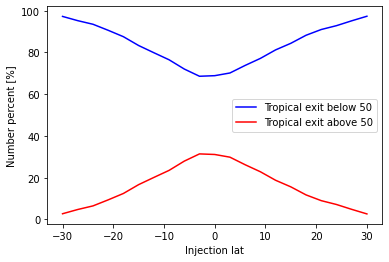

In [13]:
Num11_mean = np.mean(Num11,axis=1)
Num22_mean = np.mean(Num22,axis=1)
total_mean = Num11_mean + Num22_mean

LATs = np.arange(-30,31,3)

plt.plot(LATs, 100*Num22_mean/total_mean, 'b-', label=f'Tropical exit below {P_ref}');
plt.plot(LATs, 100*Num11_mean/total_mean, 'r-', label=f'Tropical exit above {P_ref}')

plt.xlabel("Injection lat")
plt.ylabel("Number percent [%]")
plt.legend();

In [14]:
Num11_mean + Num22_mean


array([24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24., 24.,
       24., 24., 24., 24., 24., 24., 24., 24.])

## Tropical exiting lev: annual change

18.87 65
Stratospheric lifetime: 3.2 year (Higher than 50 hPa), 1.4 year (Lower than 50 hPa)
Particle number: 0.16431712962962963 year (Higher than 50 hPa), 0.8356828703703704 year (Lower than 50 hPa)


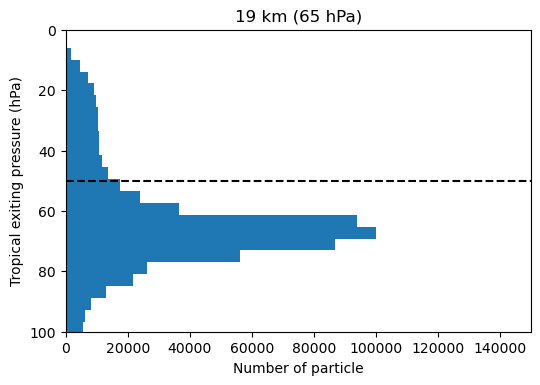

In [27]:
iz = 2

P_ref = 50

print(Height[iz], Pressure[iz])

LEV1_exit_1d = LEV1_exit[iz,:,:,:,:,:].flatten()
lifetime2_1d = lifetime2[iz,:,:,:,:,:].flatten()
LAT2_sink_1d = LAT2_sink[iz,:,:,:,:,:].flatten()

fig = plt.figure(dpi=100)

plt.hist(LEV1_exit_1d, bins=40, label="LEV", orientation='horizontal')
plt.ylim(0,100)
plt.xlim(0,150000)
plt.gca().invert_yaxis()

plt.plot([0,150000], [P_ref,P_ref],  'k--')

plt.title(f"{Height[iz]:.0f} km ({Pressure[iz]} hPa)")
plt.xlabel("Number of particle")
plt.ylabel("Tropical exiting pressure (hPa)");



idx1 = [idx for idx, val in enumerate(LEV1_exit_1d) if val < P_ref]
idx2 = [idx for idx, val in enumerate(LEV1_exit_1d) if val >= P_ref]

print(f"Stratospheric lifetime: {np.mean(lifetime2_1d[idx1])/365.25:.1f} year (Higher than {P_ref} hPa), \
{np.mean(lifetime2_1d[idx2])/365.25:.1f} year (Lower than {P_ref} hPa)")

print(f"Particle number: { len(idx1) / (len(idx1)+len(idx2)) } year (Higher than {P_ref} hPa), \
{ len(idx2) / (len(idx1)+len(idx2)) } year (Lower than {P_ref} hPa)")

18.87 65
Stratospheric lifetime: 3.3 year (Higher than 50 hPa), 1.5 year (Lower than 50 hPa)
Particle number: 0.2577847222222222 year (Higher than 50 hPa), 0.7422152777777777 year (Lower than 50 hPa)


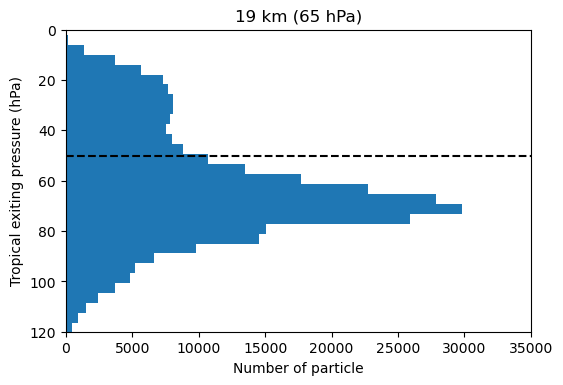

In [64]:
# LEV1_exit = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))

iz = 2

P_ref = 50

print(Height[iz], Pressure[iz])

LEV1_exit_1d = LEV1_exit[iz,5:15,:,:,:,:].flatten()
lifetime2_1d = lifetime2[iz,5:15,:,:,:,:].flatten()
LAT2_sink_1d = LAT2_sink[iz,5:15,:,:,:,:].flatten()

fig = plt.figure(dpi=100)

plt.hist(LEV1_exit_1d, bins=40, label="LEV", orientation='horizontal')
plt.ylim(0,120)
plt.xlim(0,35000)
plt.gca().invert_yaxis()

plt.plot([0,150000], [P_ref,P_ref],  'k--')

plt.title(f"{Height[iz]:.0f} km ({Pressure[iz]} hPa)")
plt.xlabel("Number of particle")
plt.ylabel("Tropical exiting pressure (hPa)");



idx1 = [idx for idx, val in enumerate(LEV1_exit_1d) if val < P_ref]
idx2 = [idx for idx, val in enumerate(LEV1_exit_1d) if val >= P_ref]

print(f"Stratospheric lifetime: {np.mean(lifetime2_1d[idx1])/365.25:.1f} year (Higher than {P_ref} hPa), \
{np.mean(lifetime2_1d[idx2])/365.25:.1f} year (Lower than {P_ref} hPa)")

print(f"Particle number: { len(idx1) / (len(idx1)+len(idx2)) } year (Higher than {P_ref} hPa), \
{ len(idx2) / (len(idx1)+len(idx2)) } year (Lower than {P_ref} hPa)")

In [75]:
iz = 2

Ps = np.arange(0,130,10)
Ps_mid = np.arange(5,120,10)

print(Ps)
print(Ps_mid)

LEV1_exit_1d = LEV1_exit[iz,5:15,:,:,:,:].flatten()
lifetime2_1d = lifetime2[iz,5:15,:,:,:,:].flatten() 

lieftime_mean = []
for P in tqdm(Ps_mid):
    idx1 = [idx for idx, val in enumerate(LEV1_exit_1d) if P-5 < val < P+5]
    lieftime_mean.append(np.mean(lifetime2_1d[idx1]))

  0%|          | 0/12 [00:00<?, ?it/s]

[  0  10  20  30  40  50  60  70  80  90 100 110 120]
[  5  15  25  35  45  55  65  75  85  95 105 115]


100%|██████████| 12/12 [00:09<00:00,  1.26it/s]


In [76]:
lieftime_mean = np.array(lieftime_mean)

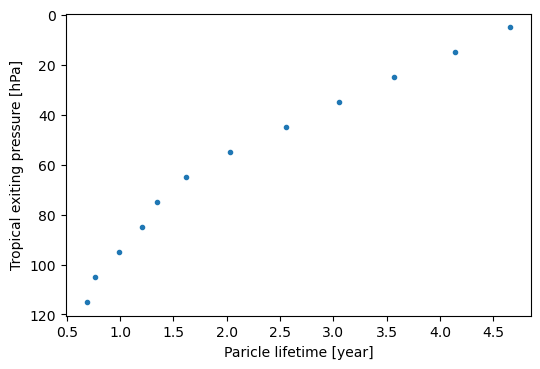

In [77]:
# LON1_exit = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))

fig = plt.figure(dpi=100)

plt.plot(lieftime_mean/365.25, Ps_mid, '.');
plt.ylabel("Tropical exiting pressure [hPa]")
plt.xlabel("Paricle lifetime [year]");

plt.gca().invert_yaxis()

In [18]:
LEV1_exit[iz,:,:,:,:,:].shape

(21, 24, 10, 12, 10)

In [19]:
print(f"Stratospheric lifetime: {np.mean(abs(LAT2_sink_1d[idx1])):.1f} (Higher than 40 hPa), \
{np.mean(abs(LAT2_sink_1d[idx2])):.1f} (Lower than 40 hPa)")

Stratospheric lifetime: 43.2 (Higher than 40 hPa), 42.9 (Lower than 40 hPa)
